#Why Scikit-learn?
* Built on NumPy and Matplotlib (and python)
* Has many in built machine learning models
* Methods to evaluate your machine learning models
* Well designed API

Workflow:
1. Get data ready
2. Pick a model
3. Fit the model
4. Evaluate the model
5. Improve through experimentation

# Introduction to Scikit-learn

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
heart_disease = pd.read_csv("heart-disease.csv")
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
# 1. Getting the data  ready
# Create X - features Matrix
X = heart_disease.drop("target",axis=1)

# Create y - Labels Matrix
y = heart_disease["target"]


In [ ]:
# 2. Chose the right model and hyper paramaters
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=100) # n estimators: The number of trees in the forest.

# keep default hyperpermaters
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [ ]:
# 3. fit the model to the training data
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=(0.2))


In [ ]:
clf.fit(X_train,y_train);

In [ ]:
y_preds = clf.predict(X_test)
y_preds

array([0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1])

In [ ]:
# 4. evaluate the model
clf.score(X_train,y_train)

1.0

In [ ]:
clf.score(X_test,y_test)

0.7868852459016393

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           0       0.69      0.78      0.73        23
           1       0.86      0.79      0.82        38

    accuracy                           0.79        61
   macro avg       0.77      0.79      0.78        61
weighted avg       0.79      0.79      0.79        61



In [ ]:
confusion_matrix(y_test,y_preds)

array([[18,  5],
       [ 8, 30]])

In [ ]:
accuracy_score(y_test,y_preds)

0.7868852459016393

In [ ]:
#5. Imporve a model
# Try differeent ammount of n_estimators
np.random.seed(42)
for i in range(10,100,10):
  print("Trying model with",i,"Estimators")
  clf=RandomForestClassifier(n_estimators=i).fit(X_train,y_train)
  print("Model accuracy on test set:",clf.score(X_test,y_test)*100)
  print("")

Trying model with 10 Estimators
Model accuracy on test set: 77.04918032786885

Trying model with 20 Estimators
Model accuracy on test set: 75.40983606557377

Trying model with 30 Estimators
Model accuracy on test set: 80.32786885245902

Trying model with 40 Estimators
Model accuracy on test set: 85.24590163934425

Trying model with 50 Estimators
Model accuracy on test set: 80.32786885245902

Trying model with 60 Estimators
Model accuracy on test set: 77.04918032786885

Trying model with 70 Estimators
Model accuracy on test set: 80.32786885245902

Trying model with 80 Estimators
Model accuracy on test set: 83.60655737704919

Trying model with 90 Estimators
Model accuracy on test set: 78.68852459016394



# 1. Getting our data ready to be used with machine learning

Three main things we have to do:
1. Split the data into features and labels (usually `X` and `y`)
2. Filling (also called imputing) or disregarding missing values
3. converting non numerical values to numerical values (called feature encoding)

In [ ]:
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
X = heart_disease.drop("target",axis=1)
X.head(1)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1


In [ ]:
y = heart_disease["target"]
y.head(1)

0    1
Name: target, dtype: int64

In [ ]:
# Split the data into training and test sets
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=(0.2))

In [ ]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((242, 13), (61, 13), (242,), (61,))

In [ ]:
X.shape

(303, 13)

## 1.1 make sure data is numerical

In [ ]:
car_sales = pd.read_csv("car-sales.csv")
car_sales.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431,4,15323
1,BMW,Blue,192714,5,19943
2,Honda,White,84714,4,28343
3,Toyota,White,154365,4,13434
4,Nissan,Blue,181577,3,14043


In [ ]:
X = car_sales.drop("Price",axis=1)
X.head(1)

,Make,Colour,Odometer (KM),Doors
0,Honda,White,35431,4


In [ ]:
y= car_sales["Price"]
y.head(1)

0    15323
Name: Price, dtype: int64

In [ ]:
# Split into test and training
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=(0.2))
len(X_train)

800

In [ ]:
# Build machine learning model      [ FAILS - STRING VALUES]
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()
model.fit(X_train,y_train)
model.score(X_test,y_test)

ValueError: ignored

In [ ]:
# Turn categories into numbers
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ["Make","Colour","Doors"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot",one_hot,categorical_features)],remainder="passthrough")

transformed_X = transformer.fit_transform(X)


In [ ]:
pd.DataFrame(transformed_X)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,35431.0
1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,192714.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,84714.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,154365.0
4,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,181577.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,35820.0
996,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,155144.0
997,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,66604.0
998,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,215883.0


In [ ]:
dummies = pd.get_dummies(car_sales[["Make","Colour","Doors"]])
dummies

,Doors,Make_BMW,Make_Honda,Make_Nissan,Make_Toyota,Colour_Black,Colour_Blue,Colour_Green,Colour_Red,Colour_White
0,4,0,1,0,0,0,0,0,0,1
1,5,1,0,0,0,0,1,0,0,0
2,4,0,1,0,0,0,0,0,0,1
3,4,0,0,0,1,0,0,0,0,1
4,3,0,0,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...
995,4,0,0,0,1,1,0,0,0,0
996,3,0,0,1,0,0,0,0,0,1
997,4,0,0,1,0,0,1,0,0,0
998,4,0,1,0,0,0,0,0,0,1


In [ ]:
# Lets refit the model
np.random.seed(42)
X_train, X_test, y_train, y_test = train_test_split(transformed_X,y,test_size=0.2)

model.fit(X_train,y_train)
model.score(X_test,y_test)

0.3235867221569877

## 1.2 What if there were missing values?
1. Fill them with some value (known as imputation)
2. remove the samples with missing data altogether

In [ ]:
# import car sales missing data
car_sales_missing = pd.read_csv("car-sales-missing-data.csv")
car_sales_missing.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0


In [ ]:
car_sales_missing.isna().sum() # shows us how many missing values there is

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [ ]:
# Create X and y
X = car_sales_missing.drop("Price",axis=1)
y = car_sales_missing["Price"]

In [ ]:
# lets try convert our data to numbers
# Turn categories into numbers
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ["Make","Colour","Doors"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot",one_hot,categorical_features)],remainder="passthrough")

transformed_X = transformer.fit_transform(X)


## Option 1: Fill missing data with pandas


In [ ]:
# # Fill the Make column
# car_sales_missing["Make"].fillna("missing",inplace=True)
# # Fill the Colour column
# car_sales_missing["Colour"].fillna("missing",inplace=True)
# # Fill the Odometer column
# car_sales_missing["Odometer (KM)"].fillna(15,inplace=True)

# # Fill the dOORS column
# car_sales_missing["Doors"].fillna(4,inplace=True)

In [ ]:
# # Remove rows with missing price value
# car_sales_missing.dropna(inplace=True)

In [ ]:
car_sales_missing.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

## Option 2: Filling missing values with scikit learn

In [ ]:
car_sales_missing.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [ ]:
# Drop rows with no labels
car_sales_missing.dropna(subset=["Price"], inplace=True)
car_sales_missing.isna().sum()

Make             47
Colour           46
Odometer (KM)    48
Doors            47
Price             0
dtype: int64

In [ ]:
# Split into X and y
X= car_sales_missing.drop("Price", axis=1)
y = car_sales_missing["Price"]

In [ ]:
# Fill missing values with Scikit-Learn
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

# Fill categorical values with "missing" and numerical values with mean
cat_imputer = SimpleImputer(strategy="constant",fill_value="missing")
door_imputer = SimpleImputer(strategy="constant",fill_value=4)
num_imputer = SimpleImputer(strategy="mean")

# Define columns
cat_features=["Make","Colour"]
door_features=["Doors"]
num_features=["Odometer (KM)"]

# Create an imputer (something that fills missing data)
imputer = ColumnTransformer([
                             ("cat_imputer",cat_imputer,cat_features),
                             ("door_imputer",door_imputer,door_features),
                             ("num_imputer",num_imputer,num_features),
])

# transform the data
filled_X = imputer.fit_transform(X)
filled_X

array([['Honda', 'White', 4.0, 35431.0],
       ['BMW', 'Blue', 5.0, 192714.0],
       ['Honda', 'White', 4.0, 84714.0],
       ...,
       ['Nissan', 'Blue', 4.0, 66604.0],
       ['Honda', 'White', 4.0, 215883.0],
       ['Toyota', 'Blue', 4.0, 248360.0]], dtype=object)

In [ ]:
car_sales_filled = pd.DataFrame(filled_X,columns=["Make","Colour","Doors","Odometer (KM)"])
car_sales_filled.isna().sum()

Make             0
Colour           0
Doors            0
Odometer (KM)    0
dtype: int64

In [ ]:
# lets try convert our data to numbers
# Turn categories into numbers
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ["Make","Colour","Doors"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot",one_hot,categorical_features)],remainder="passthrough")

transformed_X = transformer.fit_transform(car_sales_filled)
transformed_X

<950x15 sparse matrix of type '<class 'numpy.float64'>'
	with 3800 stored elements in Compressed Sparse Row format>

In [ ]:
# Now we got our data as numbers and filled (no missing data)
# lets fit a model

np.random.seed(42)
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(transformed_X,y,test_size=0.2)

model = RandomForestRegressor(n_estimators=100)
model.fit(X_train,y_train)
model.score(X_test,y_test)

0.21990196728583944

# 2. Chosing the right estimator/algorithm for your problem
Things to note:
* Sk-learn refers to machine learning models, algorithms as estimators
* classification problem - predictiing a category (heart disease or not)
  * sometimes `clf` (short for classifier) used as classification estimator
* regression problem - predicting a number (selling price of a car)

if your working on a machine learning problem and looking to use Sklearn and not sure what model to use, refere to sklearn machine learning map

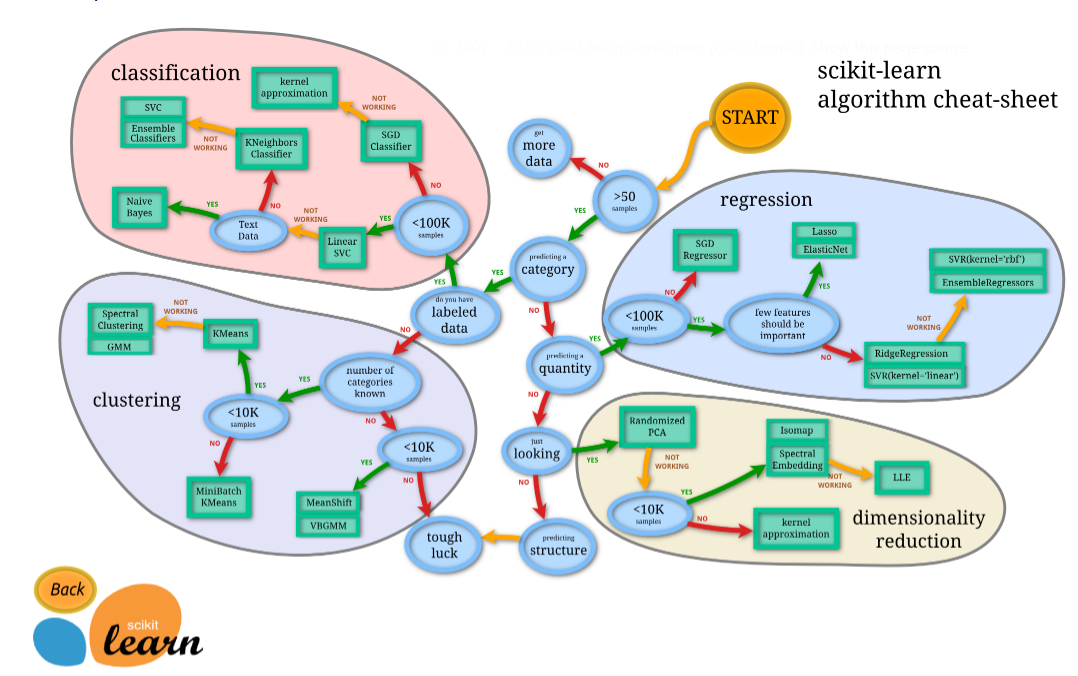

## 2.1 Picking a machine learning model for a regression problem
Lets use the california house dataset

In [ ]:
# get california housing dataset
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()
housing

{'DESCR': '.. _california_housing_dataset:\n\nCalifornia Housing dataset\n--------------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 20640\n\n    :Number of Attributes: 8 numeric, predictive attributes and the target\n\n    :Attribute Information:\n        - MedInc        median income in block group\n        - HouseAge      median house age in block group\n        - AveRooms      average number of rooms per household\n        - AveBedrms     average number of bedrooms per household\n        - Population    block group population\n        - AveOccup      average number of household members\n        - Latitude      block group latitude\n        - Longitude     block group longitude\n\n    :Missing Attribute Values: None\n\nThis dataset was obtained from the StatLib repository.\nhttps://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html\n\nThe target variable is the median house value for California districts,\nexpressed in hundreds of thousands of dollars

In [ ]:
housing_df = pd.DataFrame(housing["data"],columns=housing["feature_names"])
housing_df.head(1)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.02381,322.0,2.555556,37.88,-122.23


In [ ]:
housing_df["target"] = housing["target"]
housing_df.head(1)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.02381,322.0,2.555556,37.88,-122.23,4.526


In [ ]:
from sklearn.linear_model import Ridge

# Setup random seed
np.random.seed(42)

# Split data into X and y
X = housing_df.drop("target",axis=1)
y = housing_df["target"] # median house  price in $100,000

# split into train test
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

# Instantiate and fit the model (on training set)
model = Ridge()
model.fit(X_train,y_train)

# Check model score on test data
model.score(X_test,y_test) # measure linear relationship between 2 variables, how much is our model able to predict the target variable
 


0.5758549611440126

What if `ridge` didnt work or the score didnt fit our needs?
we can always try a different model

In [ ]:
# Import the randomforestregressor model class from the nsemble module
from sklearn.ensemble import RandomForestRegressor

# Setup random seed
np.random.seed(42)

# Split data into X and y
X = housing_df.drop("target",axis=1)
y = housing_df["target"] # median house  price in $100,000

# split into train test
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

# Instantiate and fit the model (on training set)
model = RandomForestRegressor()
model.fit(X_train,y_train)

# Check model score on test data
model.score(X_test,y_test) # measure linear relationship between 2 variables, how much is our model able to predict the target variable
 

0.8066196804802649

## 2.2 Picking a machine learning model for a classification model

In [ ]:
heart_disease = pd.read_csv("heart-disease.csv")
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
len(heart_disease)

303

Consulted map and it says to try `linearSVC`

In [ ]:
from sklearn.svm import LinearSVC

#setup random seed
np.random.seed(42)

# make the data
X = heart_disease.drop("target",axis=1)
y= heart_disease["target"]

# split data into train and test
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

# make the model
clf = LinearSVC(max_iter=1000)
clf.fit(X_train,y_train)

# Check model on our test data
clf.score(X_test,y_test)

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


0.8688524590163934

In [ ]:
# Compare it to random forest classifier

from sklearn.ensemble import RandomForestClassifier

#setup random seed
np.random.seed(42)

# make the data
X = heart_disease.drop("target",axis=1)
y= heart_disease["target"]

# split data into train and test
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

# make the model
clf = RandomForestClassifier()
clf.fit(X_train,y_train)

# Check model on our test data
clf.score(X_test,y_test)

0.8524590163934426

### Note: 
* If you have structured data i.e tables , use ensemble methods i.e RandomForestClassifier/regressor
* If unstrucuted data, use deep learning / transfer learning

## 3. Fit the model / algorithm on our data and use it to make predtictions
### 3.1 Fitting the model to the data

* X = features, feature variables, data
* y = labels, targets, target variables

In [ ]:
# Compare it to random forest classifier

from sklearn.ensemble import RandomForestClassifier

#setup random seed
np.random.seed(42)

# make the data
X = heart_disease.drop("target",axis=1)
y= heart_disease["target"]

# split data into train and test
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

# Fit the model to the data (training the ML Model)
clf = RandomForestClassifier()
clf.fit(X_train,y_train)

# Check model on our test data (use the patterns the model has learned)
clf.score(X_test,y_test)

0.8524590163934426

### 3.2 make predictions using a ml model
2 ways to make predictions:
1. `predict()`
2. `predict_proba()`

In [ ]:
# use a trained model to make predictions
clf.predict(np.array([1,7,8,3,4])) #  [FAILS]

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"


ValueError: ignored

In [ ]:
y_preds = clf.predict(X_test)
y_preds

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0])

In [ ]:
np.array([y_test])

array([[0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
        0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0]])

In [ ]:
# Compare predictions to truth labels to evaluate the model
np.mean(y_preds == y_test)

0.8524590163934426

In [ ]:
clf.score(X_test,y_test)

0.8524590163934426

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_preds)

0.8524590163934426

### Make predictions with predict_proba()


In [ ]:
# predict_proba() returns probabilities of a classification label
clf.predict_proba(X_test[:5])

array([[0.89, 0.11],
       [0.49, 0.51],
       [0.43, 0.57],
       [0.84, 0.16],
       [0.18, 0.82]])

In [ ]:
# Lets prerdict on the same data
clf.predict(X_test[:5])

array([0, 1, 1, 0, 1])

`predict()` can also be used for regression models

In [ ]:
housing_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [ ]:
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

X = housing_df.drop("target",axis=1)
y = housing_df["target"]

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

model = RandomForestRegressor(n_estimators=100)
model.fit(X_train,y_train)

y_preds = model.predict(X_test)
y_preds

array([0.49384  , 0.75494  , 4.9285964, ..., 4.8363785, 0.71782  ,
       1.67901  ])

In [ ]:
y_preds[:10]

array([0.49384  , 0.75494  , 4.9285964, 2.54029  , 2.33176  , 1.6549701,
       2.34323  , 1.66182  , 2.47489  , 4.8344779])

In [ ]:
np.array(y_test[:10])

array([0.477  , 0.458  , 5.00001, 2.186  , 2.78   , 1.587  , 1.982  ,
       1.575  , 3.4    , 4.466  ])

In [ ]:
# Compare the predictions to the truth
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test,y_preds) # On average how off is prediction from truth 

0.3265721842781009

In [ ]:
housing_df["target"].head()

0    4.526
1    3.585
2    3.521
3    3.413
4    3.422
Name: target, dtype: float64

# 4. Evaluating a machine learning mode
Three ways to evaluate scikit learn models/estimators:
  1. Estimators built in `score()` method
  2. the `scoring` paramaters
  3. problem-specific metric functions


## 4.1 Evaluating a model with `score` method

In [ ]:
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

# Create X and y
X = heart_disease.drop("target",axis=1)
y=heart_disease["target"]

# create train/test
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

# Create classifier model instance
clf = RandomForestClassifier(n_estimators=100)

# fit classifier to training data
clf.fit(X_train,y_train)

RandomForestClassifier()

In [ ]:
clf.score(X_test,y_test)

0.8524590163934426

Lets use the `score()` method on our regression problem

In [ ]:
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

X = housing_df.drop("target",axis=1)
y = housing_df["target"]

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

model = RandomForestRegressor(n_estimators=100)
model.fit(X_train,y_train)


RandomForestRegressor()

In [ ]:
model.score(X_test,y_test)

0.8066196804802649

## 4.2 evaluating a model using the `scoring` paramater

In [ ]:
from sklearn.model_selection import cross_val_score

In [ ]:
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

# Create X and y
X = heart_disease.drop("target",axis=1)
y=heart_disease["target"]

# create train/test
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

# Create classifier model instance
clf = RandomForestClassifier(n_estimators=100)

# fit classifier to training data
clf.fit(X_train,y_train)

RandomForestClassifier()

In [ ]:
clf.score(X_test,y_test)

0.8524590163934426

In [ ]:
cross_val_score(clf,X,y, cv=5)

array([0.83606557, 0.8852459 , 0.7704918 , 0.8       , 0.8       ])

## 4.2.1 Classification model evaluation metrics
1. accuracy
2. Area under ROC column
3. confusion matrix
4. Classification report

###**Accuracy**

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

# Create X and y
X = heart_disease.drop("target",axis=1)
y=heart_disease["target"]

# create train/test
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

# Create classifier model instance
clf = RandomForestClassifier(n_estimators=100)

# fit classifier to training data
clf.fit(X_train,y_train)

RandomForestClassifier()

In [ ]:
cross_val_score = cross_val_score(clf,X,y,cv=5)

In [ ]:
print(f"Cross validated Accuracy score: {np.mean(cross_val_score)*100:.2f}%") # mean accuracy of our model


Cross validated Accuracy score: 81.16%


###**Area under Recieve Ooperating Charicteristic Curve**
* Area under curve (AUC)
* ROC curve

ROC curves are a comparison of a models true positive rate (tpr) versus a models false positive rate (fpr)

* true positive: model predicts 1 when truth is 1
* false positive: model predicts 1 when truth is 0

* true negative: model preidicts 0 when truth is 0
* false negative: model predicts 0 when truth is 1

In [ ]:
# create train/test
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [ ]:
from sklearn.metrics import roc_curve

# make predictions with probabilities
y_probs = clf.predict_proba(X_test)

y_probs[:10]


array([[0.94, 0.06],
       [0.06, 0.94],
       [0.34, 0.66],
       [0.11, 0.89],
       [0.06, 0.94],
       [0.02, 0.98],
       [0.05, 0.95],
       [0.91, 0.09],
       [0.85, 0.15],
       [0.02, 0.98]])

In [ ]:
 y_probs_positive = y_probs[:,1]
 y_probs_positive[:10]

array([0.06, 0.94, 0.66, 0.89, 0.94, 0.98, 0.95, 0.09, 0.15, 0.98])

In [ ]:
# calculate fpr, tpr and threshhold
fpr, tpr, thresholds = roc_curve(y_test,y_probs_positive)

In [ ]:
# Create a function for plotting ROC curves
import matplotlib.pyplot as plt

def plot_roc_curve(fpr,tpr):
  """
  Plots a ROC curve rate given fpr and tpr of a model
  """
  plt.plot(fpr,tpr,color="orange",label="ROC")
  #plot line with no predictive power
  plt.plot([0,1],[0,1],color="darkblue",linestyle="--",label="Guessing")

  plt.xlabel("False positive rate (FPR)")
  plt.xlabel("True positive rate (TPR)")

  plt.title("ROC Curve")

  plt.legend()
  plt.show()


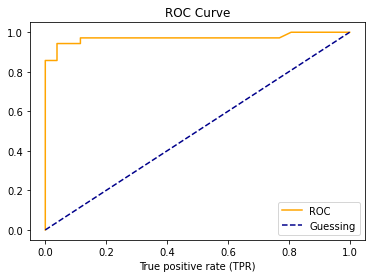

In [ ]:
plot_roc_curve(fpr,tpr)

In [ ]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test,y_probs_positive)

0.9708791208791208

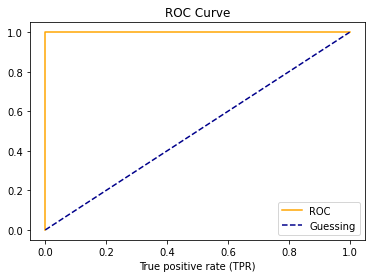

In [ ]:
# plot perfect ROC curve and AUC score

fpr, tpr, thresholds = roc_curve(y_test,y_test)
plot_roc_curve(fpr,tpr)

###**Confusion Matrix**

A confusion matrix is a quick way to compare the labels a model pricts and the actual labels it was supposed to predict



In [ ]:
from sklearn.metrics import confusion_matrix
y_preds =  clf.predict(X_test)

confusion_matrix(y_test,y_preds)

array([[25,  1],
       [ 3, 32]])

In [ ]:
# Visualise confuction matrix with pd.crosstab()
pd.crosstab(y_test,y_preds,rownames=["Actual Label"],colnames=["Predicted Labels"])

Predicted Labels,0,1
Actual Label,,
0,25,1
1,3,32


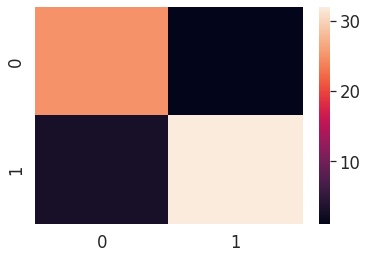

In [ ]:
# Make our ocnfusion matrix more visual with seaborns heatmap()
import seaborn as sns

#set font scale
sns.set(font_scale=1.5)

#create a confusion matrix
conf_mat = confusion_matrix(y_test,y_preds)

# plot using seaborn
sns.heatmap(conf_mat)

### Creating confusion matrix with scikit learn
* from estimator - plot confusion matrix given stimator, data and label
* from predictions - plot confusion matrix given true and predicted labels

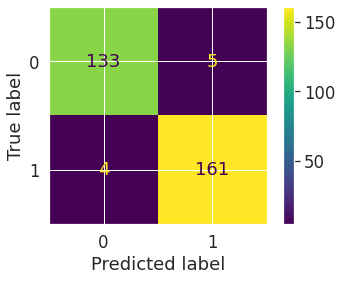

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay 

ConfusionMatrixDisplay.from_estimator(estimator=clf,X=X,y=y)

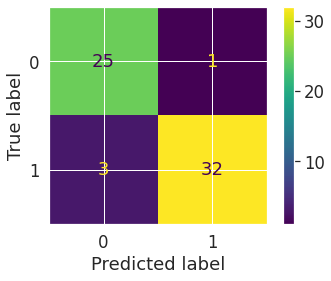

In [ ]:
ConfusionMatrixDisplay.from_predictions(y_true=y_test,y_pred=y_preds)

###**Classification Report**

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           0       0.89      0.96      0.93        26
           1       0.97      0.91      0.94        35

    accuracy                           0.93        61
   macro avg       0.93      0.94      0.93        61
weighted avg       0.94      0.93      0.93        61



In [ ]:
# Where precision and recall becom valuable
disease_true = np.zeros(10000)
disease_true[0] = 1

disease_preds = np.zeros(10000)

pd.DataFrame(classification_report(disease_true,disease_preds,output_dict=True))

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,0.0,1.0,accuracy,macro avg,weighted avg
precision,0.99990,0.0,0.9999,0.499950,0.99980
recall,1.00000,0.0,0.9999,0.500000,0.99990
f1-score,0.99995,0.0,0.9999,0.499975,0.99985
support,9999.00000,1.0,0.9999,10000.000000,10000.00000


### Classification metrics
* **Accuracy** is a good measure to start with if all classes are balanced (i.e same amount of samples are labeled 0 or 1)
* **precision** and **recall** become more important when classes are imbalanced
* if false positive predictions are worse than false negaitves aim for **higher precision**
* if false negative predictions are worse than false positives , aim for **high recall**
* F1 score is a combination of precision and recall

## 4.2.2 Regression model evaluation metrics
Focus:
1. R^2 (pronounces r squared) or coefficient of determination
2. Mean absolute errore
3. Mean squared error


In [ ]:
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

X = housing_df.drop("target",axis=1)
y = housing_df["target"]

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

model = RandomForestRegressor(n_estimators=100)
model.fit(X_train,y_train)


RandomForestRegressor()

In [ ]:
model.score(X_test,y_test)

0.8066196804802649

In [ ]:
from sklearn.metrics import r2_score

#fill an array with y_test mean
y_test_mean = np.full(len(y_test),y_test.mean())

In [ ]:
r2_score(y_test,y_test_mean)

0.0

###**Mean absolute error**

MAE is average of the absolute differences between predictions and actual values

it gives you an idea of how wrong your models predictions are

In [ ]:
#MAE
from sklearn.metrics import mean_absolute_error
y_preds = model.predict(X_test)
mae = mean_absolute_error(y_test,y_preds)
mae

0.3265721842781009

In [ ]:
df = pd.DataFrame(data={"actual values":y_test,"predicted values":y_preds})

df["differences"] = df["predicted values"] - df["actual values"]
df.head()

,actual values,predicted values,differences
20046,0.47700,0.493840,0.016840
3024,0.45800,0.754940,0.296940
15663,5.00001,4.928596,-0.071414
20484,2.18600,2.540290,0.354290
9814,2.78000,2.331760,-0.448240


In [ ]:
# MAE using formulas and differences

np.abs(df["differences"]).mean()

0.3265721842781009

### **Mean Squared Error**

MSE is the mean of the square of the errors between actual and predicted values

In [ ]:
from sklearn.metrics import mean_squared_error

y_preds = model.predict(X_test)
mse = mean_squared_error(y_test,y_preds)
mse

0.2534073069137548

In [ ]:
np.square(np.abs(df["differences"])).mean()

0.2534073069137548

In [ ]:
df["squared_differences"] = np.square(df["differences"])
df

,actual values,predicted values,differences,squared_differences
20046,0.47700,0.493840,0.016840,0.000284
3024,0.45800,0.754940,0.296940,0.088173
15663,5.00001,4.928596,-0.071414,0.005100
20484,2.18600,2.540290,0.354290,0.125521
9814,2.78000,2.331760,-0.448240,0.200919
...,...,...,...,...
15362,2.63300,2.220380,-0.412620,0.170255
16623,2.66800,1.947760,-0.720240,0.518746
18086,5.00001,4.836378,-0.163632,0.026775
2144,0.72300,0.717820,-0.005180,0.000027


In [ ]:
df["squared_differences"].mean()

0.2534073069137548

### 4.2.3 Finally using the `scoring` paramater

In [192]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

# Create X and y
X = heart_disease.drop("target",axis=1)
y=heart_disease["target"]

# create train/test
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

# Create classifier model instance
clf = RandomForestClassifier(n_estimators=100)

# fit classifier to training data
clf.fit(X_train,y_train)

RandomForestClassifier()

In [197]:
np.random.seed(42)

# cross validation accuracy
cv_acc = cross_val_score(clf,X,y,cv=5,scoring=None) # if scoring is none, estimators default scoring evaluation matrix is used which is (accuracy for classification models)
cv_acc


array([0.81967213, 0.90163934, 0.83606557, 0.78333333, 0.78333333])

In [199]:
# cross validation accuracy
print(f"Cross validated Accuracy score: {np.mean(cv_acc)*100:.2f}%") # mean accuracy of our model


Cross validated Accuracy score: 82.48%


In [201]:
np.random.seed(42)

# cross validation accuracy
cv_acc = cross_val_score(clf,X,y,cv=5,scoring="accuracy") # if scoring is none, estimators default scoring evaluation matrix is used which is (accuracy for classification models)
print(f"Cross validated Accuracy score: {np.mean(cv_acc)*100:.2f}%") # mean accuracy of our model


Cross validated Accuracy score: 82.48%


In [206]:
# Precision
np.random.seed(42)

# cross validation Precision
cv_precision = cross_val_score(clf,X,y,cv=5,scoring="precision") # if scoring is none, estimators default scoring evaluation matrix is used which is (accuracy for classification models)
print(f"Cross validated precision score: {np.mean(cv_precision)*100:.2f}%") # mean precision of our model


Cross validated precision score: 83.30%


In [207]:
# Recall
np.random.seed(42)

# cross validation Recall
cv_recall = cross_val_score(clf,X,y,cv=5,scoring="recall") # if scoring is none, estimators default scoring evaluation matrix is used which is (accuracy for classification models)
print(f"Cross validated recall score: {np.mean(cv_recall)*100:.2f}%") # mean recall of our model


Cross validated recall score: 85.45%


lets see `scoring` paramater for regression

In [208]:
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

X = housing_df.drop("target",axis=1)
y = housing_df["target"]

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

model = RandomForestRegressor(n_estimators=100)
model.fit(X_train,y_train)


RandomForestRegressor()

In [216]:
np.random.seed(42)

# cross validation accuracy
cv_acc = cross_val_score(model,X,y,cv=5,scoring=None) # if scoring is none, estimators default scoring evaluation matrix is used which is (accuracy for classification models)

# cross validation accuracy
print(f"Cross validated Accuracy score: {np.mean(cv_acc)*100:.2f}%") # mean accuracy of our model


Cross validated Accuracy score: 65.21%


In [218]:
# MAE
np.random.seed(42)

# cross validation MAE
cv_mae = cross_val_score(model,X,y,cv=5,scoring="neg_mean_absolute_error") # if scoring is none, estimators default scoring evaluation matrix is used which is (accuracy for classification models)
print(f"Cross validated MAE score: {np.mean(cv_mae)*100:.2f}%") # mean mae of our model


Cross validated MAE score: -46.62%


In [219]:
# MSE
np.random.seed(42)

# cross validation MSE
cv_mse = cross_val_score(model,X,y,cv=5,scoring="neg_mean_squared_error") # if scoring is none, estimators default scoring evaluation matrix is used which is (accuracy for classification models)
print(f"Cross validated MSE score: {np.mean(cv_mse)*100:.2f}%") # mean mse of our model


Cross validated MSE score: -43.01%


## 4.3 using different evaluation metrics as scikit learn functions
3rd way to evaluate scikit learn ML models/estimators is to use the `sklearn.metrics` module

In [220]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

# Create X and y
X = heart_disease.drop("target",axis=1)
y=heart_disease["target"]

# create train/test
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

# Create classifier model instance
clf = RandomForestClassifier(n_estimators=100)

# fit classifier to training data
clf.fit(X_train,y_train)

RandomForestClassifier()

**Evaluations**

In [222]:
accuracy_score(y_test,clf.predict(X_test))

0.8524590163934426

In [223]:
precision_score(y_test,clf.predict(X_test))

0.8484848484848485

In [224]:
recall_score(y_test,clf.predict(X_test))

0.875

In [225]:
f1_score(y_test,clf.predict(X_test))

0.8615384615384615

## 5. Improving a model

First predictions = baseline predictions

First model = baseline model

From a data perspective:
* Could we collect more data? (more data, the better)
* Could we improve our data 

From a model perspective:
* Is there a better model we could use?
* Could we improve the current model?

Hyperparamters vs paramaters
* Parameters = model find these patterns in data
* Hyperparamaters = settings on a model you can adjust to (potentially) improve its ability to find patterns

3 ways to adjust hyper params:
* By hand
* randomly with RandomSearchCV
* Exhaustively with GridSearchCV

In [227]:
from sklearn.ensemble import RandomForestClassifier


clf = RandomForestClassifier(n_estimators=100)

clf.get_params() # adjustable paramaters

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

## 5.1 tuning hyperparamters by hand

Lets make 3 sets , training, valdation, test

we are going to try and adjust:
* `max_Deapth`
* `max_features`
* `mean_samples_leaf`
* `min_samples_split`
* `estimators`

In [242]:
def evaluate_preds(y_true,y_preds):
  """
  performs evaluation comparison on y_true labels vs. y_preds labels
  """
  accuracy = accuracy_score(y_true,y_preds)
  precision =precision_score(y_true,y_preds)
  recall = recall_score(y_true,y_preds)
  f1= f1_score(y_true,y_preds)
  metric_dict = {"accuracy":round(accuracy,2),"precision":round(precision,2),"recall":round(recall,2),"f1":round(f1,2)}
  
  return metric_dict

In [281]:
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

# shuffle the data
heart_disease_shuffled = heart_disease.sample(frac=1)

# Create X and y
X = heart_disease_shuffled.drop("target",axis=1)
y=heart_disease_shuffled["target"]

# split data into test, validation, train
train_split = round(0.7*len(heart_disease_shuffled)) # 70% of data
valid_split = round(train_split +0.15 *len(heart_disease_shuffled)) # 15% of data

X_train,y_train = X[:train_split],y[:train_split]
X_valid,y_valid = X[train_split:valid_split],y[train_split:valid_split]
X_test, y_test = X[valid_split:],X[valid_split:]

#len(X_train),len(X_valid),len(X_test)

clf = RandomForestClassifier()
clf.fit(X_train,y_train)

# make baseline predictions
y_preds = clf.predict(X_valid)

# Evaluate classifier on validation set
baseline_metrics = evaluate_preds(y_valid,y_preds)
baseline_metrics

{'accuracy': 0.82, 'f1': 0.85, 'precision': 0.81, 'recall': 0.88}

In [282]:
from sklearn.ensemble import RandomForestClassifier
# Create second classifier with different hyper paramaters
clf_2 = RandomForestClassifier(n_estimators=100)
clf_2.fit(X_train,y_train)

# make predictions
y_preds_2 = clf_2.predict(X_valid)

# Evaluate 2nd classifier on validation set
clf_2_metrics = evaluate_preds(y_valid,y_preds_2)
clf_2_metrics

{'accuracy': 0.84, 'f1': 0.86, 'precision': 0.85, 'recall': 0.88}

## 5.2 Hyper paramter tuning with RandomisedSearchCV

In [261]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

grid = {"n_estimators": [10, 100, 200, 500, 1000, 1200],
        "max_depth": [None, 5, 10, 20, 30],
        "max_features": ["auto", "sqrt"],
        "min_samples_split": [2, 4, 6],
        "min_samples_leaf": [1, 2, 4]}
        
from sklearn.model_selection import RandomizedSearchCV, train_test_split

np.random.seed(42)

# Split into X & y
X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Set n_jobs to -1 to use all cores (NOTE: n_jobs=-1 is broken as of 8 Dec 2019, using n_jobs=1 works)
clf = RandomForestClassifier(n_jobs=1)

# Setup RandomizedSearchCV
rs_clf = RandomizedSearchCV(estimator=clf,
                            param_distributions=grid,
                            n_iter=20, # try 20 models total
                            cv=5, # 5-fold cross-validation
                            verbose=2) # print out results

# Fit the RandomizedSearchCV version of clf
rs_clf.fit(X_train, y_train);

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   3.0s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   2.2s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   1.9s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   2.9s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   2.8s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=100; total time=   0.3s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=100; total time=   0.3s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=10

In [264]:
rs_clf.best_params_

{'max_depth': 10,
 'max_features': 'auto',
 'min_samples_leaf': 4,
 'min_samples_split': 4,
 'n_estimators': 200}

In [270]:
# predict on the test data
rs_y_preds = rs_clf.predict(X_test)

# evaluate the predictions
rs_metrics = evaluate_preds(y_test,rs_y_preds)
rs_metrics


{'accuracy': 0.85, 'f1': 0.86, 'precision': 0.85, 'recall': 0.88}

## 5.3 Hyperparamter tuning with GridSearchCV

Brute force search , will go through every option

In [272]:
grid

{'max_depth': [None, 5, 10, 20, 30],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 4, 6],
 'n_estimators': [10, 100, 200, 500, 1000, 1200]}

In [273]:
grid_2 = {'n_estimators': [1200, 1500, 2000],
          'max_depth': [None, 5, 10],
          'max_features': ['auto', 'sqrt'],
          'min_samples_split': [4, 6],
          'min_samples_leaf': [1, 2]}

In [274]:
from sklearn.model_selection import GridSearchCV, train_test_split

np.random.seed(42)

# Split into X & y
X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Set n_jobs to -1 to use all cores (NOTE: n_jobs=-1 is broken as of 8 Dec 2019, using n_jobs=1 works)
clf = RandomForestClassifier(n_jobs=1)

# Setup GridSearchCV
gs_clf = GridSearchCV(estimator=clf,
                      param_grid=grid_2,
                      cv=5, # 5-fold cross-validation
                      verbose=2) # print out progress

# Fit the RandomizedSearchCV version of clf
gs_clf.fit(X_train, y_train);

Fitting 5 folds for each of 72 candidates, totalling 360 fits
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=1200; total time=   3.1s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=1200; total time=   3.1s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=1200; total time=   3.1s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=1200; total time=   1.8s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=1200; total time=   1.7s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=1500; total time=   2.1s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=1500; total time=   2.1s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_s

In [276]:
# Max predictions with the GridSearchCV classifier
gs_y_preds = gs_clf.predict(X_test)

# Evaluate the predictions
gs_metrics = evaluate_preds(y_test, gs_y_preds)

Lets compare our different models metrics

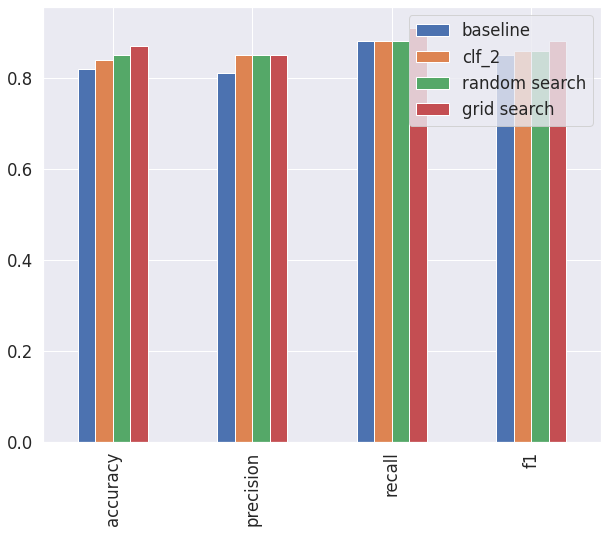

In [283]:
compare_metrics = pd.DataFrame({"baseline": baseline_metrics,
                                "clf_2": clf_2_metrics,
                                "random search": rs_metrics,
                                "grid search": gs_metrics})
compare_metrics.plot.bar(figsize=(10, 8));

## 6.  Saving  and loading trained machine learning models

In [284]:
import pickle

# Save an existing model to file
pickle.dump(gs_clf, open("gs_random_forest_model_1.pkl", "wb"))

In [285]:
# Load a saved model
loaded_pickle_model = pickle.load(open("gs_random_forest_model_1.pkl", "rb"))

In [286]:
# Make predictions and evaluate the loaded model
pickle_y_preds = loaded_pickle_model.predict(X_test)
evaluate_preds(y_test, pickle_y_preds)